The optimized values of theta are: 
[[340412.7775]
 [109440.6381]
 [ -6570.8257]]


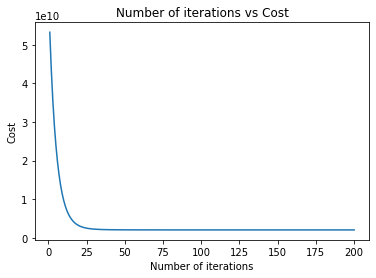

In [206]:
# Humble try to implement Linear Regression algorithm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Initial theta
theta = np.array([[0.1],[0.2],[0.3]])

# Load the dataset 
dataset = pd.read_csv("")

# Create the training dataset
X = dataset.iloc[:, 0:-1]
y = dataset.iloc[:, -1]

def normalize(X):
    '''
    Function to normalize data
    '''
    
    # Convert pandas Series to a n-dimensional vector for ease of computation
    X = np.array(X)
    
    m = X.shape[0]
    n = X.shape[1]

    X = X.reshape(m, n)
    
    # Calculate mean and standard deviation for each feature
    mu_X = np.round(np.mean(X, axis=0),4)
    sigma_X = np.round(np.std(X, axis=0),4)
    
    # Convert mean and standard deviation into matrices for easier computation
    mu_mat = np.ones((len(X),n)) * mu_X
    sigma_mat = np.ones((len(X),n)) * sigma_X
    
    # Using mean normalization
    X = np.divide(np.subtract(X,mu_mat), sigma_mat)
    
    return X

X = normalize(X)
on_s = np.ones((len(X),1))

# Add the extra X(0) feature
X = np.column_stack((on_s, X))

# Convert pandas Series to a n-dimensional vector for ease of computation
y = np.array(y).reshape(len(y), 1)

def computeCost(X, y, theta):
    '''
    Function to compute the mean of squared error
    '''
    
    hypothesis = np.matmul(X,theta)
    sum_of_sq = np.sum(np.subtract(hypothesis,y) ** 2)
    cost = 1/(2 * len(X)) * sum_of_sq
    
    return cost 

alpha = 0.1

num_iters = 200

def gradientDescent(X, y, theta, alpha, num_iters):
    '''
    Function to calculate the gradient descent
    '''
    
    J_hist = []
    
    for i in range(num_iters):
    
        hypothesis = np.matmul(X,theta)
        step = np.matmul(np.transpose(X),np.subtract(hypothesis,y))
        theta = theta - (alpha * 1/len(X)) * step
        J_hist.append(computeCost(X, y, theta))
        
    # Store cost after each step
    J_hist = np.array(J_hist).reshape(num_iters,1)

    return (theta, J_hist)

theta, J_hist = gradientDescent(X, y, theta, alpha, num_iters)

theta = np.round(theta, decimals = 4)

print(f"The optimized values of theta are: \n" + str(theta))

iterations = [i+1 for i in range(200)]

# Plot the graph to know that gradient descent is working correctly
plt.plot(iterations, J_hist)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Number of iterations vs Cost")
plt.show()